# Objetivo

O objetivo deste notebook é analisar quais são as melhores ofertas. 

Duas abordagens serão feitas para analisar a melhor oferta:

- Oferta mais visualizada

- Oferta com maior ARPU (Average Reveneu per User)

A partir das abordagens será analisado se as as três melhores ofertas presentes em cada uma delas são as mesma. 

O intuito desta análise é compreender quais ofertas poderiam ser aplicadas para novos clientes, visto que inicialmente não haverá informações acerca dele (informações relativas as interações com ofertas)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# 1 | Load data

In [2]:
customers_transactions = pd.read_csv(
    "../data/final/customers_transactions_processed.csv"
)
customers_transactions.head()

,customer_id,offer_id,total_amount,total_reward,total_offer_completed,total_offer_received,total_offer_viewed,total_transaction,total_social,total_mobile,...,total_informational,agv_time_to_view,avg_time_to_complete,credit_card_limit,days_as_customer,avg_amount,min_value,viewed_ratio,completed_ratio,gender
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,0.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,72000.0,2794.0,NaN,10.0,0.0,0.0,1
1,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,0.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,72000.0,2794.0,NaN,10.0,0.0,0.0,1
2,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,0.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,72000.0,2794.0,NaN,10.0,0.0,0.0,1
3,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,0.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,72000.0,2794.0,NaN,10.0,0.0,0.0,1
4,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,0.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,72000.0,2794.0,NaN,10.0,0.0,0.0,1


In [3]:
historical_ratio =  pd.read_csv(
    "../data/final/historical_rate.csv"
)
historical_ratio = historical_ratio.drop(columns="Unnamed: 0")
historical_ratio

,offer_id,viewed_ratio,completed_ratio,offer_id_mapping
0,fafdcd668e3743c1bb461111dcafc2a4,0.964756,0.699792,5.0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,0.961506,0.441672,9.0
2,2298d6c36e964ae4a3e7e9706d1fb8c2,0.960171,0.679481,7.0
3,f19421c1d4aa40978ebb69ca19b0e20d,0.959944,0.573650,4.0
4,5a8bc65990b245e5a138643cd4eb9837,0.879035,0.000000,3.0
5,ae264e3637204a6fb9bb56bc8210ddfd,0.876608,0.469956,10.0
6,3f207df678b143eea3cee63160fa8bed,0.543911,0.000000,2.0
7,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.542434,0.536266,8.0
8,2906b810c7d4411798c6938adc9daaa5,0.540255,0.542728,1.0
9,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.350413,0.414363,6.0


In [4]:
offers = pd.read_csv( "../data/processed/offers.csv")
offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      10 non-null     int64 
 1   channels        10 non-null     object
 2   min_value       10 non-null     int64 
 3   duration        10 non-null     int64 
 4   offer_id        10 non-null     object
 5   offer_type      10 non-null     object
 6   discount_value  10 non-null     int64 
 7   social          10 non-null     int64 
 8   mobile          10 non-null     int64 
 9   email           10 non-null     int64 
 10  web             10 non-null     int64 
 11  bogo            10 non-null     int64 
 12  discount        10 non-null     int64 
 13  informational   10 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 1.2+ KB


In [23]:
customers_agg = pd.read_csv(
    "../data/final/customer_agg.csv"
)
number_customers_noinfo = customers_agg[customers_agg["flag_info"] == 0]["customer_id"].count()

In [5]:
# Offer ID to integer mapping, to better visualization
offer_id_mapping = {
    offer_id: idx
    for idx, offer_id in enumerate(customers_transactions["offer_id"].unique(), start=1)
}

customers_transactions["offer_id_mapping"] = customers_transactions["offer_id"].map(
    offer_id_mapping
)

# 2 | Análise melhor oferta: oferta mais visualizada

Para analisar qual é a oferta mais visualiza será considerada a feature ```viewed_ratio``` a qual se refere a taxa de visualização das ofertas.

In [6]:
offer_ratio = (
    customers_transactions[["viewed_ratio", "completed_ratio", "offer_id", "offer_id_mapping"]]
    .groupby(by="offer_id")
    .mean()
    .reset_index()
    .sort_values(by="viewed_ratio", ascending=False)
)

offer_ratio

,offer_id,viewed_ratio,completed_ratio,offer_id_mapping
9,fafdcd668e3743c1bb461111dcafc2a4,0.968442,0.788947,5.0
4,4d5c57ea9a6940dd891ad53e9dbe8da0,0.963216,0.503422,9.0
8,f19421c1d4aa40978ebb69ca19b0e20d,0.962976,0.652427,4.0
1,2298d6c36e964ae4a3e7e9706d1fb8c2,0.960254,0.765897,7.0
7,ae264e3637204a6fb9bb56bc8210ddfd,0.897931,0.531691,10.0
5,5a8bc65990b245e5a138643cd4eb9837,0.892733,0.000000,3.0
6,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.569782,0.607717,8.0
2,2906b810c7d4411798c6938adc9daaa5,0.569419,0.617693,1.0
3,3f207df678b143eea3cee63160fa8bed,0.561641,0.000000,2.0
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.365515,0.476548,6.0


As quatro ofertas com mais visualizações são tem taxa de visualização acima de 96%, as ofertas são: 

- ```fafdcd668e3743c1bb461111dcafc2a4```

- ```4d5c57ea9a6940dd891ad53e9dbe8da0```

- ```f19421c1d4aa40978ebb69ca19b0e20d```

- ```2298d6c36e964ae4a3e7e9706d1fb8c2```

In [7]:
offer_ratio_infos = offer_ratio.merge(
    offers[["offer_id", "channels", "min_value", "duration", "offer_type"]],
    on="offer_id",
    how="inner",
)
offer_ratio_infos

,offer_id,viewed_ratio,completed_ratio,offer_id_mapping,channels,min_value,duration,offer_type
0,fafdcd668e3743c1bb461111dcafc2a4,0.968442,0.788947,5.0,"['web', 'email', 'mobile', 'social']",10,10,discount
1,4d5c57ea9a6940dd891ad53e9dbe8da0,0.963216,0.503422,9.0,"['web', 'email', 'mobile', 'social']",10,5,bogo
2,f19421c1d4aa40978ebb69ca19b0e20d,0.962976,0.652427,4.0,"['web', 'email', 'mobile', 'social']",5,5,bogo
3,2298d6c36e964ae4a3e7e9706d1fb8c2,0.960254,0.765897,7.0,"['web', 'email', 'mobile', 'social']",7,7,discount
4,ae264e3637204a6fb9bb56bc8210ddfd,0.897931,0.531691,10.0,"['email', 'mobile', 'social']",10,7,bogo
5,5a8bc65990b245e5a138643cd4eb9837,0.892733,0.000000,3.0,"['email', 'mobile', 'social']",0,3,informational
6,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.569782,0.607717,8.0,"['web', 'email', 'mobile']",5,7,bogo
7,2906b810c7d4411798c6938adc9daaa5,0.569419,0.617693,1.0,"['web', 'email', 'mobile']",10,7,discount
8,3f207df678b143eea3cee63160fa8bed,0.561641,0.000000,2.0,"['web', 'email', 'mobile']",0,4,informational
9,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.365515,0.476548,6.0,"['web', 'email']",20,10,discount


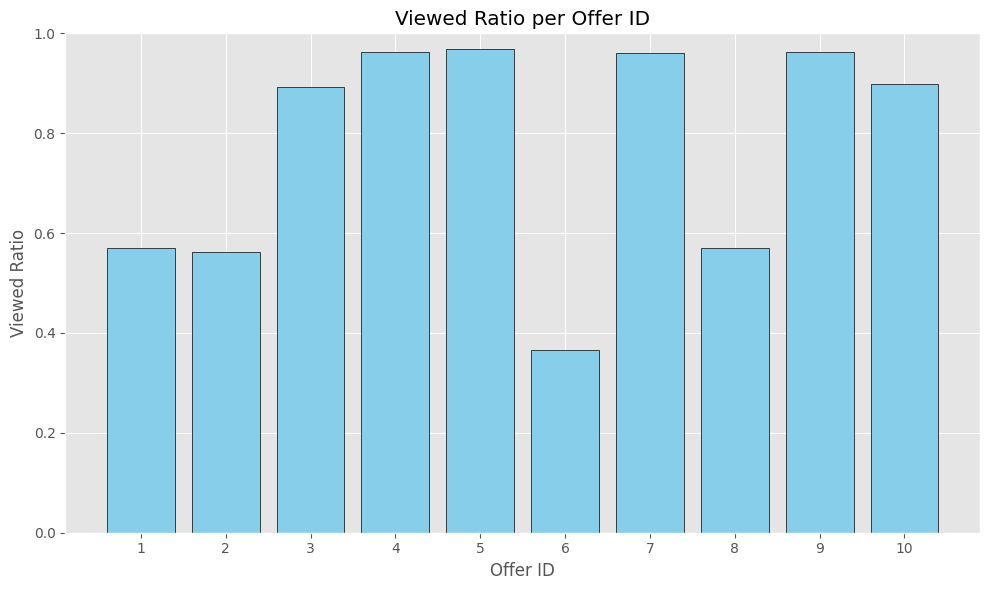

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(
    offer_ratio_infos["offer_id_mapping"],
    offer_ratio_infos["viewed_ratio"],
    color="skyblue",
    edgecolor="black",
)
plt.title("Viewed Ratio per Offer ID")
plt.xlabel("Offer ID")
plt.ylabel("Viewed Ratio")
plt.ylim(0, 1)
plt.xticks(offer_ratio_infos["offer_id_mapping"])

# Mostrar o gráfico
plt.tight_layout()
plt.show()

# 3 | Análise melhor oferta: oferta com maior ARPU

In [9]:
total_amount_per_offer = (
    customers_transactions[
        ["offer_id", "customer_id", "total_amount", "offer_id_mapping"]
    ]
    .groupby(by=["offer_id", "offer_id_mapping"])
    .agg({"total_amount": np.sum, "customer_id": "count"})
).reset_index()

total_amount_per_offer = total_amount_per_offer.rename(
    columns={"customer_id": "total_customers"}
)
total_amount_per_offer["arpu"] = np.round(
    total_amount_per_offer["total_amount"] / total_amount_per_offer["total_customers"],
    4,
)
total_amount_per_offer.sort_values("arpu", ascending=False)

/var/folders/m6/mv_nh0ks2n98r3d6kxb3tdh40000gn/T/ipykernel_6097/2467640784.py:2: FutureWarning: The provided callable <function sum at 0x1073c20d0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  customers_transactions[


,offer_id,offer_id_mapping,total_amount,total_customers,arpu
9,fafdcd668e3743c1bb461111dcafc2a4,5,16368752.32,158446,103.3081
7,ae264e3637204a6fb9bb56bc8210ddfd,10,9244418.16,154391,59.8767
8,f19421c1d4aa40978ebb69ca19b0e20d,4,7699782.88,150386,51.2001
1,2298d6c36e964ae4a3e7e9706d1fb8c2,7,7783803.46,154828,50.2739
6,9b98b8c7a33c4b65b9aebfe6a799e6d9,8,6899545.06,146243,47.1786
4,4d5c57ea9a6940dd891ad53e9dbe8da0,9,6534407.03,150664,43.3707
2,2906b810c7d4411798c6938adc9daaa5,1,5433365.93,145660,37.3017
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,6,3975808.70,144909,27.4366
5,5a8bc65990b245e5a138643cd4eb9837,3,3195623.78,142395,22.4420
3,3f207df678b143eea3cee63160fa8bed,2,2980827.33,140564,21.2062


Da análise tem-se que as ofertas com maior ARPU são:

- ```fafdcd668e3743c1bb461111dcafc2a4```

- ```ae264e3637204a6fb9bb56bc8210ddfd```

- ```f19421c1d4aa40978ebb69ca19b0e20d```

Mergeando os datasets:

In [10]:
best_offers = offer_ratio_infos.drop(columns="offer_id_mapping").merge(
    total_amount_per_offer.drop(columns="offer_id_mapping"), on="offer_id", how="inner"
)

In [11]:
best_offers.sort_values(by=["viewed_ratio", "arpu"], ascending=False).head()

,offer_id,viewed_ratio,completed_ratio,channels,min_value,duration,offer_type,total_amount,total_customers,arpu
0,fafdcd668e3743c1bb461111dcafc2a4,0.968442,0.788947,"['web', 'email', 'mobile', 'social']",10,10,discount,16368752.32,158446,103.3081
1,4d5c57ea9a6940dd891ad53e9dbe8da0,0.963216,0.503422,"['web', 'email', 'mobile', 'social']",10,5,bogo,6534407.03,150664,43.3707
2,f19421c1d4aa40978ebb69ca19b0e20d,0.962976,0.652427,"['web', 'email', 'mobile', 'social']",5,5,bogo,7699782.88,150386,51.2001
3,2298d6c36e964ae4a3e7e9706d1fb8c2,0.960254,0.765897,"['web', 'email', 'mobile', 'social']",7,7,discount,7783803.46,154828,50.2739
4,ae264e3637204a6fb9bb56bc8210ddfd,0.897931,0.531691,"['email', 'mobile', 'social']",10,7,bogo,9244418.16,154391,59.8767


Da análise conclui-se que a oferta ```fafdcd668e3743c1bb461111dcafc2a``` é a melhor, tanto em taxa de visualização quanto em ARPU

Uma estratégia para novas clientes seria indicar as ofertas com maior taxa de visualização e maior ARPU. 

Para verificar qual a melhor abordagem pode-se realizar um teste AB, em que os grupos de teste seriam as ofertas com maior taxa de visualização vs maior ARPU, considerando que não haja sobreposição das ofertas nos grupos, i.e., uma oferta pertence a um único grupo de teste.

Para realizar uma simulação do ARPU ao se implementar uma estratégia de ofertas, o valor histórico do ARPU para cada oferta será salva.

In [12]:
total_amount_per_offer.to_csv("../data/final/historical_arpu.csv")

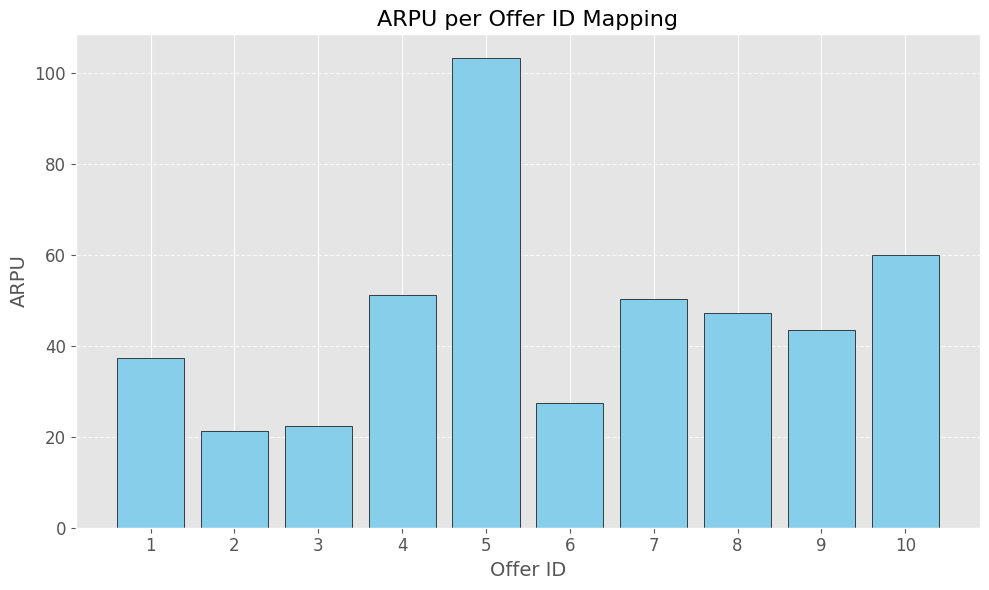

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(
    total_amount_per_offer["offer_id_mapping"],
    total_amount_per_offer["arpu"],
    color="skyblue",
    edgecolor="black",
)
plt.title("ARPU per Offer ID Mapping", fontsize=16)
plt.xlabel("Offer ID", fontsize=14)
plt.ylabel("ARPU", fontsize=14)
plt.xticks(total_amount_per_offer["offer_id_mapping"], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# 4 | ARPU

Para estimar o impacto no ARPU de recomendar as top 3 ofertas, será considerada a taxa de finaliação histórica. A ideia é ponderar a taxa de finalização pelo ARPU para ter uma estimativa de quanto o ARPU se modificaria.

In [14]:
historical_ratio

,offer_id,viewed_ratio,completed_ratio,offer_id_mapping
0,fafdcd668e3743c1bb461111dcafc2a4,0.964756,0.699792,5.0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,0.961506,0.441672,9.0
2,2298d6c36e964ae4a3e7e9706d1fb8c2,0.960171,0.679481,7.0
3,f19421c1d4aa40978ebb69ca19b0e20d,0.959944,0.573650,4.0
4,5a8bc65990b245e5a138643cd4eb9837,0.879035,0.000000,3.0
5,ae264e3637204a6fb9bb56bc8210ddfd,0.876608,0.469956,10.0
6,3f207df678b143eea3cee63160fa8bed,0.543911,0.000000,2.0
7,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.542434,0.536266,8.0
8,2906b810c7d4411798c6938adc9daaa5,0.540255,0.542728,1.0
9,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.350413,0.414363,6.0


In [17]:
historical_arpu_ratio = total_amount_per_offer.merge(historical_ratio, on="offer_id", how="inner")
historical_arpu_ratio = historical_arpu_ratio.drop(columns=["offer_id_mapping_x", "offer_id_mapping_y"])
historical_arpu_ratio

,offer_id,total_amount,total_customers,arpu,viewed_ratio,completed_ratio
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,3975808.70,144909,27.4366,0.350413,0.414363
1,2298d6c36e964ae4a3e7e9706d1fb8c2,7783803.46,154828,50.2739,0.960171,0.679481
2,2906b810c7d4411798c6938adc9daaa5,5433365.93,145660,37.3017,0.540255,0.542728
3,3f207df678b143eea3cee63160fa8bed,2980827.33,140564,21.2062,0.543911,0.000000
4,4d5c57ea9a6940dd891ad53e9dbe8da0,6534407.03,150664,43.3707,0.961506,0.441672
5,5a8bc65990b245e5a138643cd4eb9837,3195623.78,142395,22.4420,0.879035,0.000000
6,9b98b8c7a33c4b65b9aebfe6a799e6d9,6899545.06,146243,47.1786,0.542434,0.536266
7,ae264e3637204a6fb9bb56bc8210ddfd,9244418.16,154391,59.8767,0.876608,0.469956
8,f19421c1d4aa40978ebb69ca19b0e20d,7699782.88,150386,51.2001,0.959944,0.573650
9,fafdcd668e3743c1bb461111dcafc2a4,16368752.32,158446,103.3081,0.964756,0.699792


In [18]:
historical_arpu_ratio["estimated_arpu_new_clients"] = historical_arpu_ratio["arpu"] * historical_arpu_ratio["completed_ratio"]
historical_arpu_ratio.sort_values(by=["estimated_arpu_new_clients"], ascending=False)

,offer_id,total_amount,total_customers,arpu,viewed_ratio,completed_ratio,estimated_arpu_new_clients
9,fafdcd668e3743c1bb461111dcafc2a4,16368752.32,158446,103.3081,0.964756,0.699792,72.294172
1,2298d6c36e964ae4a3e7e9706d1fb8c2,7783803.46,154828,50.2739,0.960171,0.679481,34.160160
8,f19421c1d4aa40978ebb69ca19b0e20d,7699782.88,150386,51.2001,0.959944,0.573650,29.370913
7,ae264e3637204a6fb9bb56bc8210ddfd,9244418.16,154391,59.8767,0.876608,0.469956,28.139401
6,9b98b8c7a33c4b65b9aebfe6a799e6d9,6899545.06,146243,47.1786,0.542434,0.536266,25.300297
2,2906b810c7d4411798c6938adc9daaa5,5433365.93,145660,37.3017,0.540255,0.542728,20.244667
4,4d5c57ea9a6940dd891ad53e9dbe8da0,6534407.03,150664,43.3707,0.961506,0.441672,19.155626
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,3975808.70,144909,27.4366,0.350413,0.414363,11.368699
3,3f207df678b143eea3cee63160fa8bed,2980827.33,140564,21.2062,0.543911,0.000000,0.000000
5,5a8bc65990b245e5a138643cd4eb9837,3195623.78,142395,22.4420,0.879035,0.000000,0.000000


In [19]:
total_estimated_arpu_new_clients = historical_arpu_ratio["estimated_arpu_new_clients"].head(3).sum()

print("ARPU estimado para novos clientes:", total_estimated_arpu_new_clients)

ARPU estimado para novos clientes: 65.77352567753297


In [20]:
total_estimated_arpu_new_clients

65.77352567753297

In [24]:
number_customers_noinfo

2174

In [25]:
# General improvement
improvement = (total_estimated_arpu_new_clients - historical_arpu_ratio["arpu"].mean()) / historical_arpu_ratio["arpu"].mean() * 100
improvement

41.87724722749785